# ***THEORY***

1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

     - The fundamental idea behind ensemble techniques is that combining mutiple weak or base models can produce a stronger, more accurate, and more stable model than any single model alone .

     Key Points

     1. Group of models > single model : Instead of relying on one  classifier/regressor, ensemble methods combine predictions from many models

     2. Reduces variance , bias, or both :

        - Some ensembles primarily reduce variance (e.g, Bagging)

        - Some primaly reduce bias (e.g, Boosting)

    3. Improves generalisation :  Ensembles  make the final prediction more robust and less sensitive to noise.

    4. Works because errors cancel out : Individual models make different errors.when combined , these errors because out , improving accuracy.

     It is differ from boosting in terms of approach objectives are:

    1. Approach / Methodology

      - Bagging (Bootstrap Aggregating )

        - Builds multiple independent models in parallel.

        - Each model is trained on a different bootstrap sample .

        - Final prediction is made by averaging ( regression) or majority voting ( classification ) .

      - Boosting
       
        - Builds models sequentially , one after another.

        - Each new model focuses more on the mistakes of previous models .

        - Final prediction is a weighted combination of all learners.

      2. Objective

      - Bagging

        - Reduce variance

        - Works best with high-variance models

        - Goal is to improve stability and avoid overfitting.

      - Boosting

        - Reduce bias by converting weak learners into strong learners.

        - Each step **tries** to improve performance by fixing errors.

        - Goal is to achieve very high accuracy .

     
     3. Model Dependence

      - Bagging

        - Models are independent of each other.

      - Boosting

        - Models are dependent

     4. Weighted of Samples

      - Bagging

        - All samples have equal weight

        - Random resampling gives diversity.

      - Boosting

        - Misclassified samples get higher weights.

        - The algorithm forces the next model to focus on the "hard" cases.

     5. Risk of Overfitting

     - Bagging

       - Less prone to overfitting

       - Good for noisy datasets.

     - Boosting

       - More prone to overfitting if not regularised

       - Very sensitive to noise.

    - Conclusion

      Ensemble techniques improve prediction accuracy by combining mutiple models. Bagging focuses on reducing variance through parallel independent learners, while boosting focuses on reducing bias through sequential learners that correct previous mistakes.


2. **Explain how the Random Forest Classifier reduces overfitting compared to**
**a single decision tree. Mention the role of two key hyperparameters in this** **process** .

    - A single decision tree is highly prone to overfitting because it keeps splitting the data until it perfectly fits the training samples. This makes the model capture noise, leading to poor generalization on unseen data.

    A Random Forest overcomes this by creating an ensemble of many decision trees and combining their outputs through majority voting (classification) or averaging (regression). The key idea is that although individual trees may overfit in different ways, their collective predictions average out the noise, significantly reducing variance and overfitting.

Mechanisms Through Which Random Forest Reduces Overfitting
1. Bootstrap Aggregation (Bagging)

  - Random Forest uses bootstrap sampling: each tree is trained on a randomly   sampled subset (with replacement) of the original dataset.

 - This ensures that the trees are different from each other.

  - Since each tree sees a slightly different dataset, their errors are uncorrelated.

  - Combining many uncorrelated trees reduces variance, which is the main cause of overfitting.

2. Random Feature Selection at Splits

 - Instead of using all features for every split, Random Forest selects only a random subset of features at each split.

  - This forces trees to explore different decision boundaries.

  - It reduces the chance that a few strong predictors dominate all trees.

  - This increases model diversity, further reducing overfitting.

  - Role of Two Key Hyperparameters in Reducing Overfitting

1. n_estimators – Number of Trees



Role: More trees → stronger averaging → reduced variance → reduced overfitting.

2. max_features – Number of Features Considered per Split

Determines how many features are randomly selected at each node.

Smaller max_features increases randomness among trees.

Higher randomness = trees become less correlated.

Lower correlation → better variance reduction → less overfitting.

Typical values:

Classification: sqrt(n_features)

Regression: n_features/3

Role: Smaller feature subsets → diverse trees → reduced correlation → reduced overfitting.

Conclusion

Random Forest reduces overfitting by building many diverse decision trees using bagging and random feature selection, then combining their predictions to minimize variance.
The hyperparameters n_estimators and max_features play a central role in controlling tree diversity and the strength of ensemble averaging, directly influencing the model’s ability to resist overfitting.
  

3.  **What is Stacking in ensemble learning? How does it differ from traditional**
**bagging/boosting methods? Provide a simple example use case**.

    - Stacking (Stacked Generalization) is an ensemble learning technique where multiple different models (called base learners or level-0 models) are trained, and then a meta-model (level-1 model) is trained to combine their predictions.

Instead of using simple averaging or voting, stacking uses a learning algorithm to determine the best way to combine the outputs of the base models.
The meta-model learns patterns in predictions of base models and improves overall performance.

How Stacking Works

Train multiple diverse base models on the same dataset
e.g., Decision Tree, Logistic Regression, SVM, Random Forest

Generate base model predictions on a validation set.

Use these predictions as features to train a meta-learner (e.g., Linear Regression, Logistic Regression).

The meta-learner learns to combine predictions in an optimal way.

This creates a hierarchical model:
Base Models → Meta-Model → Final Prediction

How Stacking Differs from Bagging and Boosting
1. Purpose & Strategy

Bagging:
Reduces variance by training many similar models on different bootstrap samples.
Combines by majority vote/average.

Boosting:
Reduces both bias and variance by training models sequentially, where each model focuses on correcting errors of the previous one.

Stacking:
Combines different types of models using a meta-model, and the combination itself is learned.

2. Model Diversity

Bagging: Uses same model type, different subsets (e.g., Random Forest uses many decision trees).

Boosting: Uses same weak learner applied repeatedly.

Stacking: Encourages heterogeneous models (e.g., SVM + Tree + Naive Bayes).

3. Combination Method

Bagging: Simple voting/averaging.

Boosting: Weighted voting based on model performance.

Stacking: A meta-learner decides how to combine predictions.

4. Training Style

Bagging: Parallel training.

Boosting: Sequential training.

Stacking: Parallel training for base models + meta-model trained last.

Simple Example Use Case
Predicting whether a customer will buy a product (classification).

Base Models (Level-0):

Logistic Regression

Decision Tree

Random Forest

SVM

Each gives a prediction probability for “Buy”.

Meta-Model (Level-1):

A Logistic Regression model takes these four predicted probabilities as input features.

It learns:

When to trust the decision tree,

When to trust the random forest,

When logistic regression performs better, etc.

This produces a strong final classifier, often outperforming any single model.

**Conclusion**

Stacking is an advanced ensemble technique that learns how to combine different models through a meta-learner, unlike bagging and boosting that combine models through averaging or sequential weighting. It is especially useful when different models capture different aspects of the data.

4.**What is the OOB Score in Random Forest, and why is it useful? How does**
**it help in model evaluation without a separate validation set?**

  -  OOB (Out-of-Bag) Score is an internal performance estimate used in Random Forest.
During training, each tree is trained on a bootstrap sample (random sample with replacement).
About 36% of the training data is left out of this sample—these samples are called Out-of-Bag (OOB) samples.

For each tree, its OOB samples act as a built-in validation set.

The OOB Score is the accuracy (or error) computed by testing each tree on its corresponding OOB samples and then aggregating the predictions across all trees.

  - It is useful because :    

  1. No Need for Separate Validation Set

  - Since 36% of data is left out for every tree, the model naturally gets      “free” validation samples.
  This eliminates the need to:

split training data further, or

create a separate hold-out validation dataset.

This is extremely useful when the dataset is small or when we want to train on as much data as possible.

  2. Provides an Unbiased Estimate of Model Performance

     - OOB samples are never seen by the tree during its training.
Thus, OOB error acts like a cross-validation estimate, offering an unbiased and often reliable measure of test-set performance.

  3. Helps in Hyperparameter Tuning

     - OOB score helps to evaluate the effect of:

number of trees (n_estimators)

feature subsets (max_features)

depth of trees, etc.

We can optimize these hyperparameters without needing cross-validation, saving computation time.

    - It helps in models evaluation without a separate validation set :-   

    1. For each tree:

       - Train on ~ 63% bootstrapped data

       - Test on ~ 37% OOB samples

    2. Collect prediction from all trees where a sample was OOB

    3. Aggregate these predictions (majority vote or averaging)

    4. Compare with true labels > OOB accuracy/error

    Thus, every training sample gets evaluated by many trees never saw it, effectively creating a built -in cross-validation  system .

      This allows the Random Forest to :     


        - validation itself during training

        - estimate generalisation performance

        - avoid reducing training data for validation

        All without any external validation split.

    
     Conclusion

      The OOB score is a powerful internal validation mechanism in Random Forest . It provides a nearly unbiased estimate of test accuracy while allowing the model to train on the entire dataset, eliminating the need for a separate validation . This makes model evaluation faster, efficient, and especially used when data is limited.


5. Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
   
      - AdaBoost and Gradient Boosting are both boosting esemble methods, but they differ in how they handle errors, adjust weights, and in their typical use cases.

      - How they handle errors from weak learners:

        - Adaboost focuses on misclassified data points by increasing their weights in subssequent iterations.

        - Gradient Boosting builds new models to predict and correct the residuals made by previous models in the sequence.

      - Weight adjustment mechanism :     

        - AdaBoost adjust the weights of the training data at each stage , giving more importance to difficult-to-classify instances. It also assigns a weight to each weak learner's output.

        - Does not adjust the data weights. Instead, it fits models to the residuals of the current esembles. The contribution of each new tree is scaled by a learning rate to control overfitting.

      - Typical use cases

        - AdaBoost : Primarily used for binary classification tasks, often with simple decision stumps as weak learners. It is sensitive to noisly data and outliers.

        - Gradient Boosting : A versatile algorithm used effectively for both regression and classification problems. It is generally more robust to overfitting than AdaBoost if parameters are tuned correctly.


6. **Why does CatBoost perform well on categorical features without requiring**
**extensive preprocessing? Briefly explain its handling of categorical variables**.

    - CatBoost (Categorical Boosting) is specifically designed to handle categorical variables efficiently without requiring traditional preprocessing methods such as one-hot encoding or label encoding. Its strong performance on categorical features comes from two key innovations:

1 . Ordered Target Encoding (Ordered Statistics)

CatBoost converts categorical values into numerical representations using a method known as Ordered Target Encoding, which avoids target leakage.

How it works:

Instead of replacing each category with the global target mean (which causes overfitting and leakage), CatBoost processes the data in a random order.

For each data point, it calculates the target statistics (like average target value) only using previous samples, not future ones.

This produces an unbiased and leakage-free encoding.

Benefit:

Prevents overfitting.

Produces meaningful numeric values even for high-cardinality categorical features (e.g., user IDs, product IDs).

2. Combinations of Categorical Features

CatBoost automatically creates feature combinations (e.g., pairs, triples) from categorical variables.

Why this helps:

Many real-world datasets have interactions between categorical features.

Traditional encoders won’t capture these interactions unless manually engineered.

CatBoost advantage:

It generates and encodes combinations efficiently during training.

Improves model accuracy without manual feature engineering.

3. Minimal Preprocessing Needed

Because CatBoost:

natively handles categorical features,

prevents target leakage through ordered encoding,

and builds category interactions automatically,

it eliminates the need for:

One-hot encoding

Label encoding

Target encoding & smoothing

Manual feature transformations

This makes CatBoost particularly effective on datasets with many categorical variables.

Summary (Exam-Ready)

CatBoost performs well on categorical features because it uses Ordered Target Encoding, which provides leakage-free numerical representations, and it automatically builds combinations of categorical features, capturing interactions without manual preprocessing. This allows CatBoost to handle high-cardinality and complex categorical data effectively with minimal preprocessing.



# ***PRACTICAL***

In [ ]:
#7.  KNN Classifier Assignment: Wine Dataset Analysis withOptimization
#Task:
#1. Load the Wine dataset (sklearn.datasets.load_wine()).

#2. Split data into 70% train and 30% test.
#3. Train a KNN classifier (default K=5) without scaling and evaluate using:
#a. Accuracy
#b. Precision, Recall, F1-Score (print classification report)
#4. Apply StandardScaler, retrain KNN, and compare metrics.
#5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
#(Euclidean, Manhattan).
#6.Train the optimized KNN and compare results with the unscaled/scaled versions.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
# 1. Load the wine dataset

data = load_wine()
X = data.data
y = data.target
#2. split data into 70% and 30% test .

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#3. KNN without scaling (default=5)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test) # Changed 'knn' to 'knn_model'

print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. KNN with standard scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model_scaled = KNeighborsClassifier(n_neighbors=5)
knn_model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_model_scaled.predict(X_test_scaled)

print("==== KNN with Scaling ====")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for Best K (1 to 21) & Distance Metric

param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan'] # Lowercased 'Euclidean' and 'Manhattan' for scikit-learn
} # Removed trailing comma

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("=== GridSearchCV Best Parameters ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 6. Train Optimised KNN

best_knn_model = grid_search.best_estimator_
y_pred_optimised = best_knn_model.predict(X_test_scaled)

print("==== Optimised KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_optimised))
print("Classification Report",classification_report(y_test, y_pred_optimised))

=== KNN without Scaling ===
Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

==== KNN with Scaling ====
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

=== GridSearchCV Best Parameters ===
Best Parameters: {'metric': 'manhattan',

In [ ]:
# 8. PCA + KNN with Variance Analysis and Visualization
#Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).


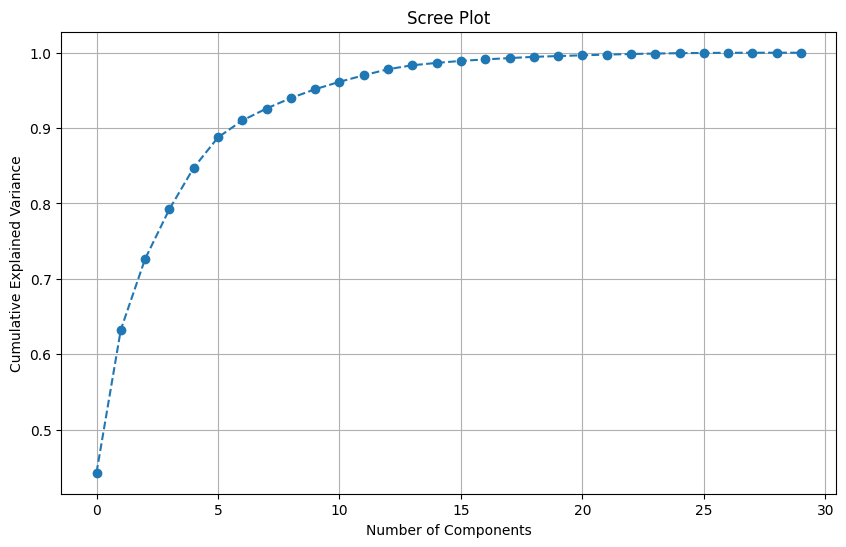

Number of components to retain 95% variance: 10

 ----- Accuracy Comparison -----
Accuracy before PCA: 0.9590643274853801
Accuracy after PCA: 0.9649122807017544


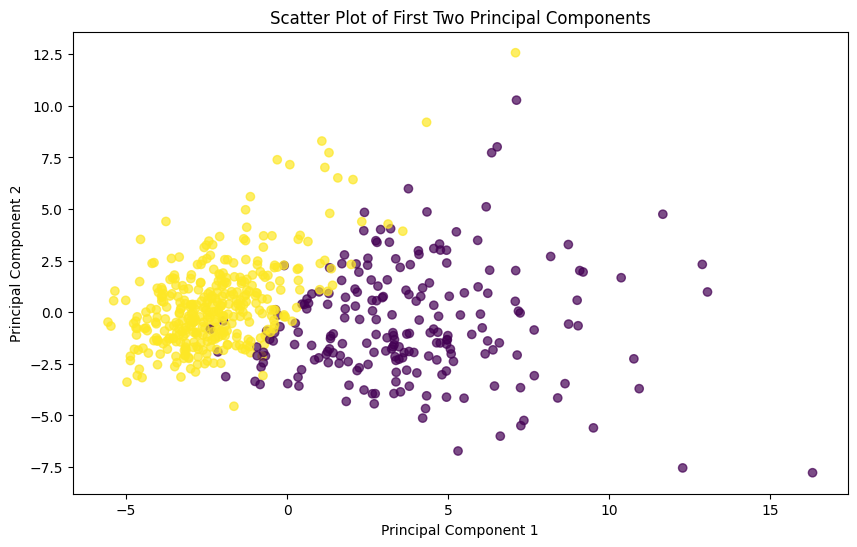

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Load the breast cancer dataset

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and plot scree plot

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transfer dataset

pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# 4. Train KNN before and after pca

X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print("\n ----- Accuracy Comparison -----")
print(f"Accuracy before PCA: {acc_original}")
print(f"Accuracy after PCA: {acc_pca}")

# 5. Visualise the first two pricipal components

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y , cmap="viridis", alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()